# Maximum Expected Coverage Location Problem（MEXCLP）

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Maximum-Expected-Coverage-Location-Problem（MEXCLP）" data-toc-modified-id="Maximum-Expected-Coverage-Location-Problem（MEXCLP）-1">Maximum Expected Coverage Location Problem（MEXCLP）</a></span><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1.1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#MEXCLP" data-toc-modified-id="MEXCLP-1.1.1">MEXCLP</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-1.2">Setup</a></span><ul class="toc-item"><li><span><a href="#Set-up-the-environment-by-importing-libraries" data-toc-modified-id="Set-up-the-environment-by-importing-libraries-1.2.1">Set up the environment by importing libraries</a></span></li></ul></li><li><span><a href="#Example" data-toc-modified-id="Example-1.3">Example</a></span><ul class="toc-item"><li><span><a href="#Case1.-Solving-MEXCLP-(Maximum-Expected-Coverage-Location-Problems)-with-synthetic-data" data-toc-modified-id="Case1.-Solving-MEXCLP-(Maximum-Expected-Coverage-Location-Problems)-with-synthetic-data-1.3.1">Case1. Solving MEXCLP (Maximum Expected Coverage Location Problems) with synthetic data</a></span></li><li><span><a href="#Case2.-Solving-MEXCLP-(Maximum-Expected-Coverage-Location-Problems)-with-real-world-data" data-toc-modified-id="Case2.-Solving-MEXCLP-(Maximum-Expected-Coverage-Location-Problems)-with-real-world-data-1.3.2">Case2. Solving MEXCLP (Maximum Expected Coverage Location Problems) with real-world data</a></span></li></ul></li></ul></li></ul></div>

## Problem Description

### MEXCLP

Daskin <sup>[1]</sup> developed the MEXCLP based on the MCLP formula, which assumes that each contingency facility has the same probability of being busy. The MEXCLP is an integer linear programming model that allows for the assignment of more than one contingency facility at each demand point. The MEXCLP is developed by placing k contingency facilities at a demand point, with the aim of **maximizing expected demand.** The MEXCLP assumes that each contingency facility has the same probability of being busy.

*Parameters*:
* **$d_{i}$** : demand on point $i$
* **$N_{i}$** : Set of facilities that could cover demand point $i$
* **$p$** : Number of facilities
* **$q_{k}$** : Reliability of coverage given $k$ facilities

*Decision variables*:
$$
\begin{array}{lll}
X_{j}= \begin{cases}1, & \text { if facility } j \text{ is chosen} \\ 0, & \text { else }\end{cases}\\
Y_{jk}= \begin{cases}1, & \text { demand point } i \text{ is covered by } k \text { facilities} \\ 0, & \text { else }\end{cases}
\end{array}
$$

###  Integer programming model:

$$
\begin{array}{lll}
\text{Max} & \sum_{i=1}^{n} \sum_{k=1}^{p} {d_i q_{k} Y_{ik}} & (1) \\
\text{s.t.} & \sum_{j\in N_i}^{} X_j - \sum_{k=1}^{p}kY_{ik} \le 0,i=1,...,n, & (2)\\
& \sum_{j=1}^{m}X_{j} \;\le\; p ,j=1,...,m, & (3)\\
\end{array}
$$


* The objective function equation (1) describes the number of demands at node $i$ that can be covered by $k$ emergency facilities within the corresponding response time/distance.<br>
* This objective function aims to maximize the sum of the demand and coverage reliability of the nodes.<br>
* The system constraints are shown from (2) to (5). <br>
* Equation (3) limits the number of emergency facilities that can be allocated at $j$ to a maximum of p. <br>
* (4) and (5) show $X_j$ and $Y_j$, with $k$ set to 0 or 1, which indicate the decision variables.

[1] Daskin M S. A maximum expected covering location model: formulation, properties and heuristic solution[J]. Transportation science, 1983, 17(1): 48-70.

## Setup

### Set up the environment by importing libraries
import numpy, pulp, matplotlib and Hispot libraries to set up an environment

In [1]:
import random
import numpy as np
from pulp import *
import matplotlib.pyplot as plt
from hispot.coverage import MEXCLP

PuLP is an open source linear programming package (actually also includes integer programming). You can use `pip install pulp` to start. 

PuLP supports many open source linear programming solvers, such as `CBC` and `GLPK`; in addition, it also supports commercial solvers such as `Gurobi` and IBM's `CPLEX`.
The default is CBC, and PuLP will be installed by default. For most problems, the CBC open source solver from COIN-OR will suffice.
You can use `listSolvers(onlyAvailable=True)` to check the available solvers.

In [2]:
np.random.seed(0) # random seed
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  

['CPLEX_CMD', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

In this part, we will input synthetic data and real-world data and display them as two examples to represent random cases and real-world scenarios, respectively.

### Case1. Solving MEXCLP (Maximum Expected Coverage Location Problems) with synthetic data

Generate problem with synthetic data

In [3]:
n_points = 20
prob = 0.8
p = 4
radius = 0.2
demand = np.random.randint(1, 2, size=n_points)
points = [(random.random(), random.random()) for i in range(n_points)]
points_np = np.array(points)

Output optimal solution

In [4]:
centers, obj = MEXCLP(num_located=p,
                      demand=demand,
                      num_points=n_points,
                      points=points_np,
                      radius=radius,
                      unprob_rate=prob,
                      solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [3, 14, 17, 19]
The objective is =  4.0


D:\miniconda3\envs\higis\Lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


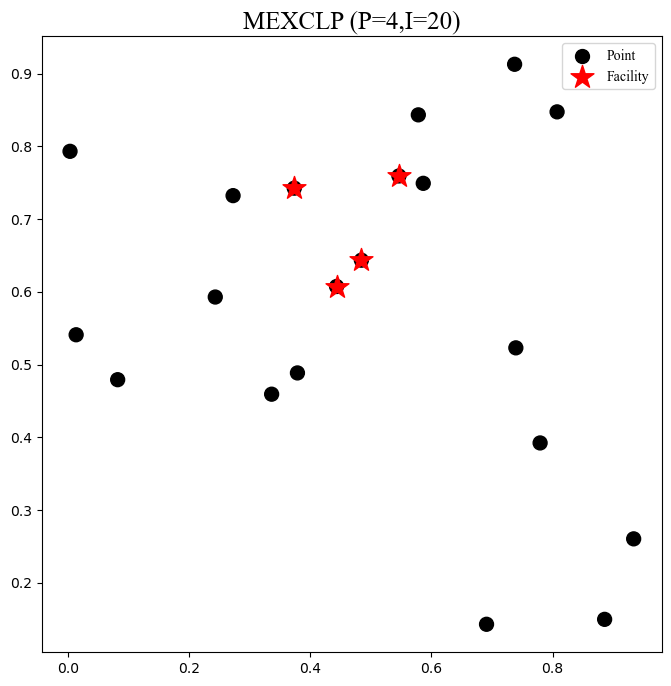

In [5]:
#Image representation
plt.figure(figsize=(8,8))
name = 'MEXCLP (P=' + str(p) + ',I=' + str(n_points) + ')'
plt.title(name, font = 'Times New Roman', fontsize = 18)
#Points
# points_np.plot(color='red', markersize=num_people*2, label="Point")
plt.scatter(points_np[:, 0], points_np[:, 1], c='black', s=demand*100, label="Point")
plt.scatter(points_np[centers, 0], points_np[centers, 1], c='red', marker='*', s=300, label="Facility")
# plt.grid(True)
plt.legend(loc='best', prop = 'Times New Roman',fontsize = 20)
plt.show()

### Case2. Solving MEXCLP (Maximum Expected Coverage Location Problems) with real-world data

import `geopandas`, `geoplot` to plot the real world map.

In [6]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

We select Fengtai District of Beijing the study area and read partial poi points in Fengtai District.

In [7]:
%%time
region=gpd.read_file("../data/beijing/fengtai/fengtai.shp")
region.head(2)

CPU times: total: 15.6 ms
Wall time: 22.4 ms


,ID,geometry
0,1,"POLYGON ((116.42039 39.85679, 116.41767 39.856..."
1,2,"MULTIPOLYGON (((116.30331 39.85959, 116.30498 ..."


Partial POI data in Fengtai district

In [8]:
%%time
poi = gpd.read_file("../data/beijing/fengtai/fengtai-poi.shp")
poi.shape[0]

CPU times: total: 15.6 ms
Wall time: 7.97 ms


60

In [9]:
def render_north_arrow(ax, x, y, size, ratio = 1):
    path = [(0, 1), (-ratio, -1), (0, -0.5), (ratio, -1), (0, 1)]
    path = [(i[0] * size + x, i[1] * size + y) for i in path]
    arrow = plt.Polygon(path, color='black', transform=ax.transAxes)
    ax.add_patch(arrow)
    ax.text(x, y-size*2, s = 'N', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

Visualization of the input data by geoplot

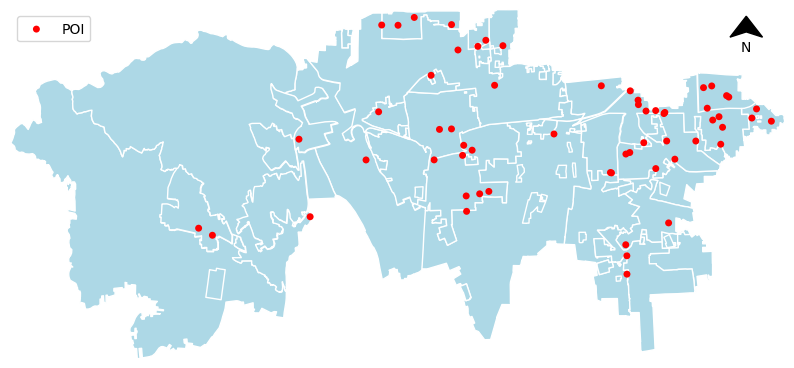

In [13]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 8))
gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='red',
               alpha=1,
               linewidth=0,
               label='POI',
               ax=ax)
plt.legend(loc='upper left')
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.03,ratio = 0.7)

Generate problem with real-world data

In [19]:
data = poi[['lon', 'lat']]
num_points = poi.shape[0]
num_located = 10
radius = 0.2
prob = 0.2
points = [(data['lon'][i], data['lat'][i]) for i in range(num_points)]
points_np = np.array(points)
demand = np.random.randint(1, 2, size=n_points)

Output optimal solution

In [20]:
centers, obj = MEXCLP(num_located=num_located,
                      demand=demand,
                      num_points=n_points,
                      points=points_np,
                      radius=radius,
                      unprob_rate=prob,
                      solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected points = [0, 1, 10, 11, 12, 13, 14, 15, 16, 17]
The objective is =  10.0


D:\miniconda3\envs\higis\Lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


prepare the center Points to plot the solution

In [23]:
center_points = poi.iloc[centers]

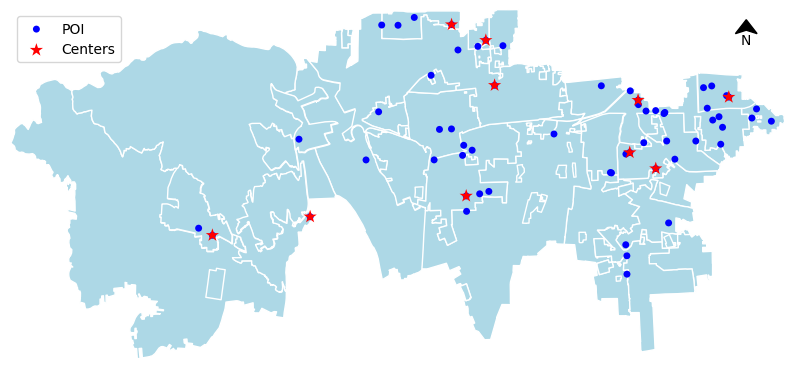

In [24]:
ax = gplt.polyplot(region,
                   projection=gcrs.AlbersEqualArea(),
                   edgecolor="white", facecolor="lightblue",
                   figsize=(10, 8))

gplt.pointplot(poi, 
               extent=region.total_bounds,
               s=5,
               color='blue',
               alpha=1,
               linewidth=0,
               label='POI',
               zorder=2,
               ax=ax)
gplt.pointplot(center_points, 
               extent=region.total_bounds,
               s=10,
               color='red',
               alpha=1,
               linewidth=0,
               marker='*',
               label='Centers',
               zorder=4,
               ax=ax)
render_north_arrow(ax = ax, x = 0.95, y = 0.95, size = 0.02,ratio = 0.7)
plt.legend(loc='upper left')